In [116]:
import pandas as pd
file_path = 'C:/Users/i/Desktop/2020빅콘테스트 문제데이터(혁신아이디어분야)/04_유통데이터(GS리테일)/'
file_name = '04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx'
GS_retail_df = pd.read_excel(file_path+file_name,sheet_name='종합테이블(TB_DD_STR_PURCH_CLS)')

In [117]:
GS_retail_df.head()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
0,20190201,대구광역시,수성구,고산1동,1.064336,0.450848,0.172221,0.295458,0.023263,0.044679,0.005075,0.004820,0.003637
1,20190201,대구광역시,수성구,고산2동,1.076418,0.457937,0.196274,0.295564,0.005521,0.034056,0.000844,0.008893,0.000913
2,20190201,대구광역시,수성구,고산3동,0.856071,0.359978,0.196602,0.376762,0.013408,0.029606,0.009117,0.008831,0.005697
3,20190201,대구광역시,수성구,두산동,0.724868,0.281969,0.175207,0.363202,0.024235,0.134191,0.000000,0.021196,0.000000
4,20190201,대구광역시,수성구,만촌1동,1.155728,0.400983,0.200454,0.310531,0.038868,0.035427,0.005284,0.005734,0.002719


In [118]:
Soosung = GS_retail_df[GS_retail_df.BOR=='수성구']
Soosung.tail()

,OPER_DT,PVN,BOR,ADMD,AMT_IND,LCLS_10_P,LCLS_20_P,LCLS_30_P,LCLS_40_P,LCLS_50_P,LCLS_60_P,LCLS_70_P,LCLS_80_P
14415,20200531,대구광역시,수성구,중동,0.881659,0.226395,0.237206,0.418409,0.030844,0.063764,0.003591,0.011636,0.008155
14416,20200531,대구광역시,수성구,지산1동,0.693028,0.287638,0.215746,0.427646,0.006841,0.047279,0.004215,0.004061,0.006574
14417,20200531,대구광역시,수성구,지산2동,0.695978,0.284647,0.254447,0.368794,0.023602,0.062472,0.000670,0.002750,0.002617
14418,20200531,대구광역시,수성구,황금1동,1.021302,0.255774,0.290241,0.376098,0.009759,0.041915,0.000000,0.015637,0.010576
14419,20200531,대구광역시,수성구,황금2동,0.784628,0.285177,0.183722,0.394433,0.046631,0.070320,0.008183,0.008631,0.002903


In [119]:
Soosung_flow = Soosung.pivot_table('AMT_IND',index='OPER_DT',aggfunc='mean')
Soosung_flow_19=Soosung_flow.iloc[:120]
Soosung_flow_20=Soosung_flow.iloc[120:]
Soosung_flow_19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 20190201 to 20190531
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AMT_IND  120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [120]:
Soosung_flow_19.index=Soosung_flow_19.index.astype('str')
Soosung_flow_20.index=Soosung_flow_20.index.astype('str')
Soosung_flow_19.index=map(lambda x:x[4:],Soosung_flow_19.index)
Soosung_flow_20.index=map(lambda x:x[4:],Soosung_flow_20.index)
Soosung_flow_19.columns=['AMT_IND_19']
Soosung_flow_20.columns=['AMT_IND_20']
Soosung_comp=pd.merge(Soosung_flow_19,Soosung_flow_20,left_index=True,right_index=True)
Soosung_comp.head(15)

,AMT_IND_19,AMT_IND_20
0201,0.942798,0.887850
0202,0.966712,0.829453
0203,0.900273,0.854917
0204,0.941973,0.876429
0205,0.998489,0.856056
0206,0.852927,0.886547
0207,0.935782,0.924138
0208,0.944171,0.894486
0209,0.913044,0.835245
0210,0.849788,0.909162


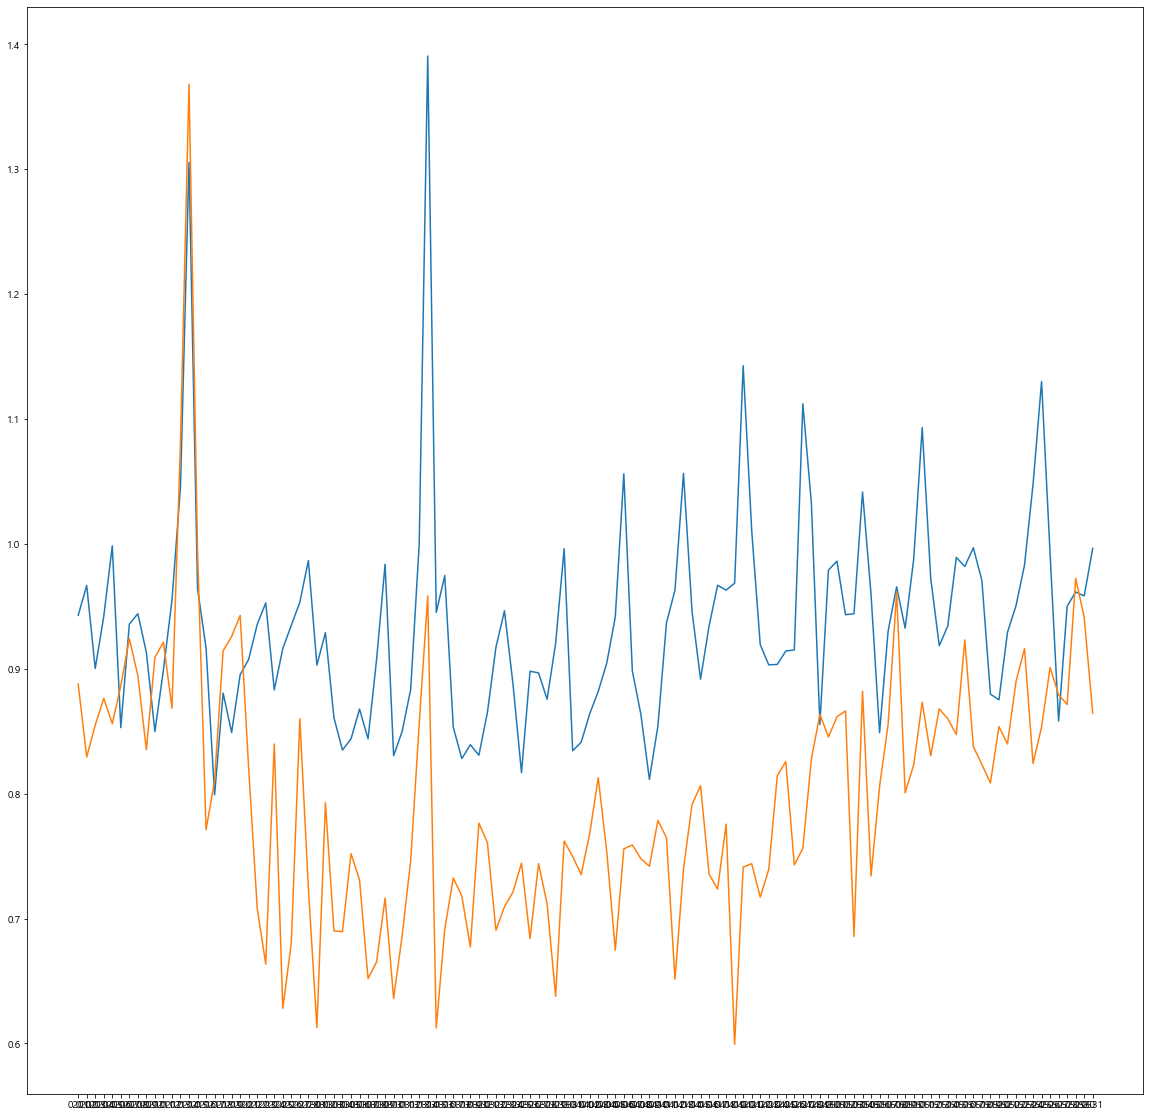

In [121]:
import matplotlib.pyplot as plt

Fg = plt.figure(figsize=(20,20))
plt.plot(Soosung_comp)

In [23]:
from matplotlib import font_manager as fm
fm._rebuild()

In [45]:
print(matplotlib.rcParams['font.family'])

['BM DoHyeon']


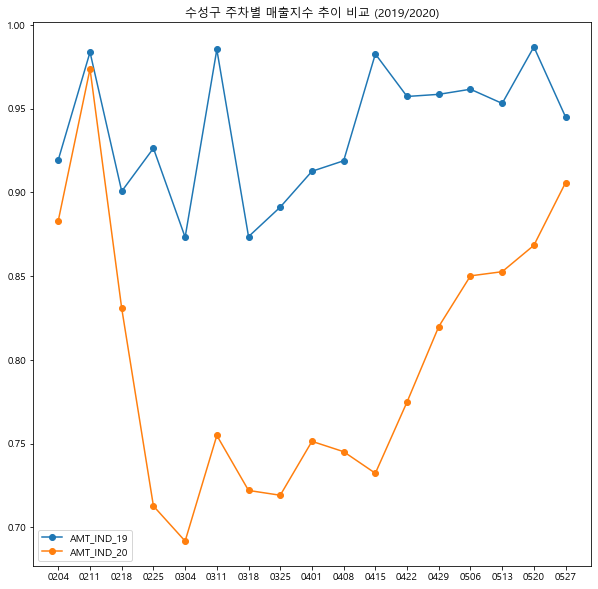

In [128]:
import matplotlib 

matplotlib.rcParams['axes.unicode_minus'] = False

fig2=plt.figure(2,(10,10))
Soosung_comp_week = pd.DataFrame()
Soosung_comp_week['AMT_IND_19']=Soosung_comp['AMT_IND_19'][3::7]
Soosung_comp_week['AMT_IND_20']=Soosung_comp['AMT_IND_20'][3::7]

for i in range(len(Soosung_comp_week['AMT_IND_19'])):
    Soosung_comp_week['AMT_IND_19'].iloc[i]=Soosung_comp['AMT_IND_19'].iloc[i*7+3:i*7+10].mean()
    Soosung_comp_week['AMT_IND_20'].iloc[i]=Soosung_comp['AMT_IND_20'].iloc[i*7+3:i*7+10].mean()

plt.rc('font', family='Malgun Gothic')
plt.plot(Soosung_comp_week,marker='o')
plt.legend(Soosung_comp_week.columns)
plt.title('수성구 주차별 매출지수 추이 비교 (2019/2020)')

plt.show()

In [24]:
import matplotlib.font_manager as fm
fl = fm.findSystemFonts(fontpaths=None,fontext='ttf')
fl

['C:\\Windows\\Fonts\\CALISTBI.TTF',
 'C:\\Windows\\Fonts\\BERNHC.TTF',
 'C:\\Windows\\Fonts\\palab.ttf',
 'C:\\Windows\\Fonts\\CALIFI.TTF',
 'C:\\Windows\\Fonts\\BOD_CR.TTF',
 'C:\\Windows\\Fonts\\BRLNSDB.TTF',
 'C:\\Windows\\Fonts\\HMKMMAG.TTF',
 'C:\\Windows\\Fonts\\H2MJRE.TTF',
 'C:\\Windows\\Fonts\\GOUDOSB.TTF',
 'C:\\Windows\\Fonts\\BOOKOSBI.TTF',
 'C:\\Windows\\Fonts\\BOD_CBI.TTF',
 'C:\\Windows\\Fonts\\ARLRDBD.TTF',
 'C:\\Windows\\Fonts\\Candara.ttf',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\msyhl.ttc',
 'C:\\Windows\\Fonts\\ANTQUAI.TTF',
 'C:\\Windows\\Fonts\\LATINWD.TTF',
 'C:\\Windows\\Fonts\\LBRITEDI.TTF',
 'C:\\Windows\\Fonts\\CALIST.TTF',
 'C:\\Windows\\Fonts\\STENCIL.TTF',
 'C:\\Windows\\Fonts\\H2GSRB.TTF',
 'C:\\Windows\\Fonts\\BRUSHSCI.TTF',
 'C:\\Windows\\Fonts\\mmrtext.ttf',
 'C:\\Windows\\Fonts\\taile.ttf',
 'C:\\Windows\\Fonts\\LTYPE.TTF',
 'C:\\Windows\\Fonts\\MISTRAL.TTF',
 'C:\\Windows\\Fonts\\marlett.ttf',
 'C:\\Windows\\Fonts\\VLADIMIR.TTF',


In [30]:
a=fm.FontProperties(fname=fl[-99])
a.get_name()

'BM DoHyeon'

In [129]:
Soosung_cat = Soosung.pivot_table(('LCLS_10_P','LCLS_20_P','LCLS_30_P','LCLS_40_P','LCLS_50_P','LCLS_60_P','LCLS_70_P','LCLS_80_P'),index='OPER_DT',aggfunc='mean')
Soosung_cat.columns=['식사','간식','마실거리','홈&리빙','헬스&뷰티','취미&여가','사회활동','임신/육아']
Soosung_cat_19=Soosung_cat.iloc[:120]
Soosung_cat_20=Soosung_cat.iloc[120:]

In [130]:
Soosung_cat_19.index=Soosung_cat_19.index.astype('str')
Soosung_cat_20.index=Soosung_cat_20.index.astype('str')
Soosung_cat_19.index=map(lambda x:x[4:],Soosung_cat_19.index)
Soosung_cat_20.index=map(lambda x:x[4:],Soosung_cat_20.index)
Soosung_cat_19.columns=map(lambda x:x+'_19',Soosung_cat_19.columns)
Soosung_cat_20.columns=map(lambda x:x+'_20',Soosung_cat_20.columns)
Soosung_comp_cat=pd.merge(Soosung_cat_19,Soosung_cat_20,left_index=True,right_index=True)
Soosung_comp_cat.head(15)

,식사_19,간식_19,마실거리_19,홈&리빙_19,헬스&뷰티_19,취미&여가_19,사회활동_19,임신/육아_19,식사_20,간식_20,마실거리_20,홈&리빙_20,헬스&뷰티_20,취미&여가_20,사회활동_20,임신/육아_20
0201,0.368733,0.197699,0.323036,0.035616,0.056150,0.004391,0.009835,0.004540,0.296330,0.231796,0.340095,0.022910,0.087646,0.003765,0.010499,0.006960
0202,0.342155,0.209694,0.342061,0.021843,0.062797,0.005666,0.010260,0.005523,0.308637,0.228064,0.324574,0.022323,0.100893,0.004189,0.006046,0.005273
0203,0.330463,0.209001,0.329882,0.020041,0.092638,0.005853,0.007780,0.004342,0.338517,0.212239,0.317843,0.025321,0.087167,0.004851,0.009681,0.004380
0204,0.317292,0.226315,0.336767,0.020591,0.072395,0.007808,0.012815,0.006016,0.332569,0.213574,0.330091,0.032074,0.076943,0.003384,0.008064,0.003301
0205,0.268633,0.236620,0.369346,0.018710,0.073340,0.008947,0.015006,0.009398,0.342336,0.219393,0.304448,0.026161,0.092842,0.002975,0.008976,0.002869
0206,0.336169,0.199377,0.362727,0.018520,0.059484,0.007399,0.011614,0.004711,0.334152,0.214990,0.314790,0.024209,0.095486,0.003687,0.008621,0.004066
0207,0.377657,0.195017,0.331937,0.018971,0.048587,0.007084,0.017862,0.002885,0.337384,0.217904,0.306937,0.025254,0.095478,0.004741,0.008689,0.003613
0208,0.370341,0.207224,0.333282,0.023112,0.046214,0.006093,0.009626,0.004109,0.293196,0.235999,0.336545,0.027233,0.087436,0.004948,0.008827,0.005816
0209,0.359887,0.213647,0.333464,0.020358,0.048914,0.007823,0.011551,0.004357,0.309565,0.238333,0.325108,0.023171,0.083832,0.004139,0.008947,0.006904
0210,0.365096,0.209197,0.336041,0.021756,0.049610,0.004802,0.009880,0.003616,0.333285,0.216869,0.318729,0.026967,0.084417,0.003943,0.008008,0.007783


Text(0.5, 1.0, '수성구 항목 별 매출 2020')

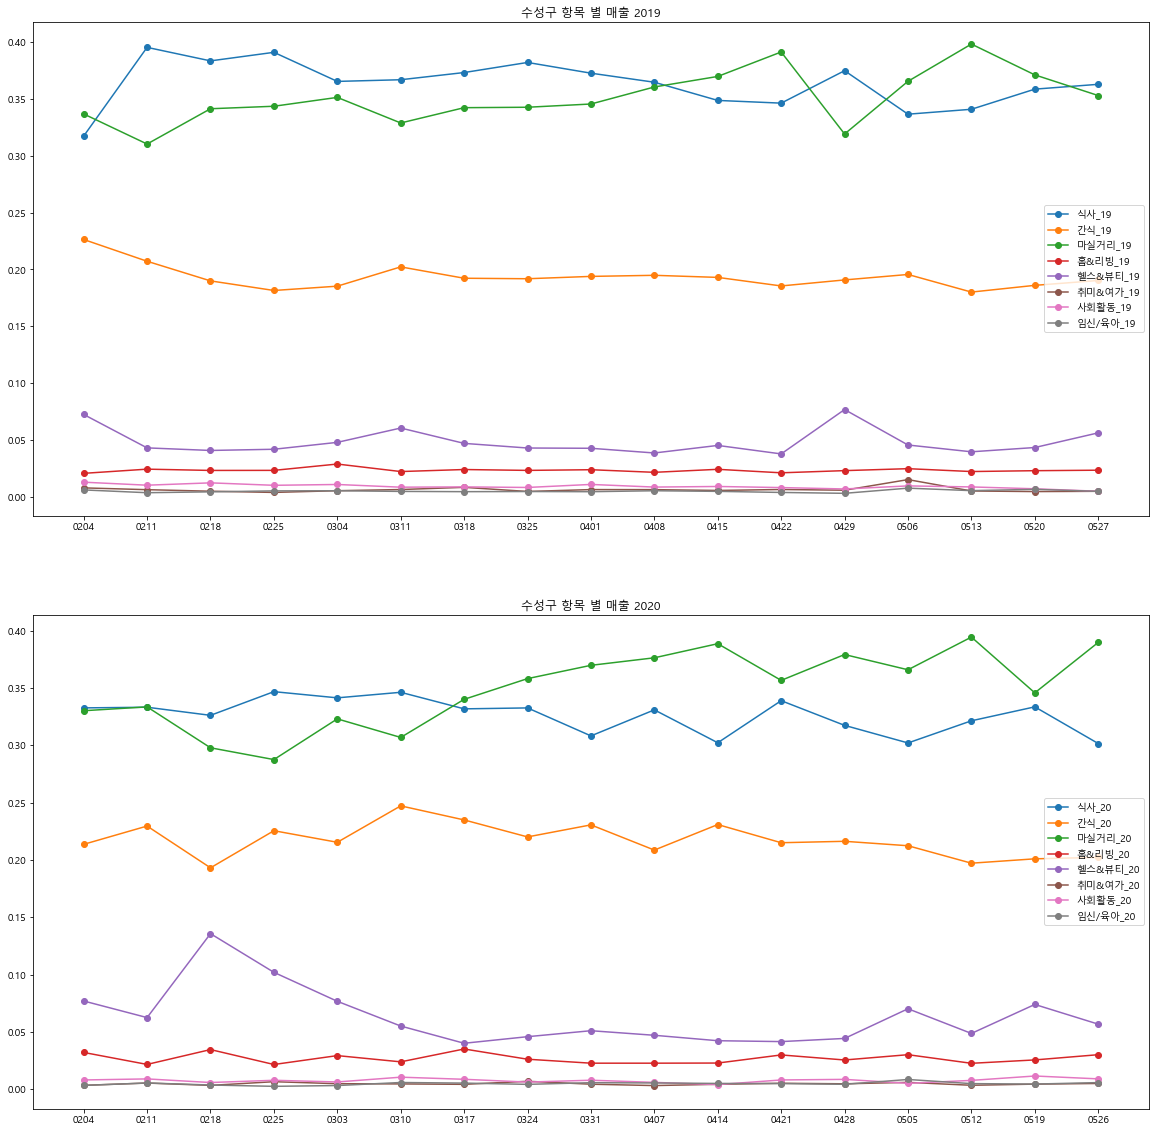

In [131]:
Fg2 = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic')
plt.subplot(2,1,1)
plt.plot(Soosung_cat_19.iloc[3::7],marker='o')
plt.legend(Soosung_cat_19.columns,loc='best')
plt.title('수성구 항목 별 매출 2019')
plt.subplot(2,1,2)
plt.plot(Soosung_cat_20.iloc[3::7],marker='o')
plt.legend(Soosung_cat_20.columns,loc='best')
plt.title('수성구 항목 별 매출 2020')

Text(0.5, 1.0, '수성구 항목 별 매출 2020')

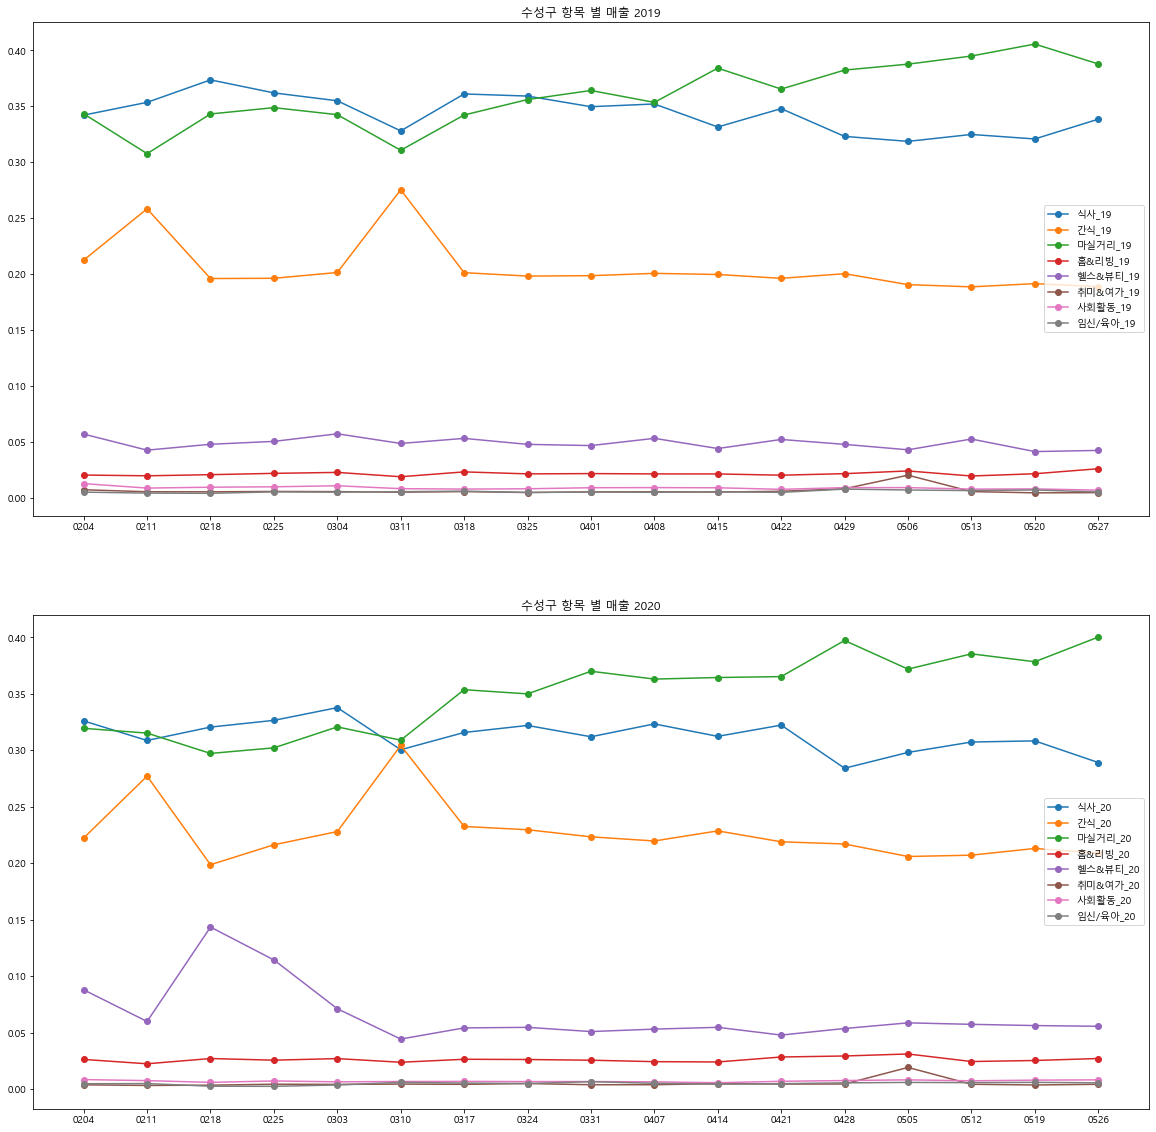

In [132]:
Soosung_catmean_19 = Soosung_cat_19.iloc[3::7].copy()
Soosung_catmean_20 = Soosung_cat_20.iloc[3::7].copy()

for i in range(len(Soosung_catmean_19['식사_19'])):
    for j in range(len(Soosung_catmean_19.columns)):
        key1= Soosung_catmean_19.columns[j]
        key2= Soosung_catmean_20.columns[j]
        Soosung_catmean_19[key1].iloc[i]=Soosung_cat_19[key1].iloc[i*7+3:i*7+10].copy().mean()
        Soosung_catmean_20[key2].iloc[i]=Soosung_cat_20[key2].iloc[i*7+3:i*7+10].copy().mean()

Fg3 = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic')
plt.subplot(2,1,1)
plt.plot(Soosung_catmean_19,marker='o')
plt.legend(Soosung_catmean_19.columns,loc='best')
plt.title('수성구 항목 별 매출 2019')
plt.subplot(2,1,2)
plt.plot(Soosung_catmean_20,marker='o')
plt.legend(Soosung_catmean_20.columns,loc='best')
plt.title('수성구 항목 별 매출 2020')

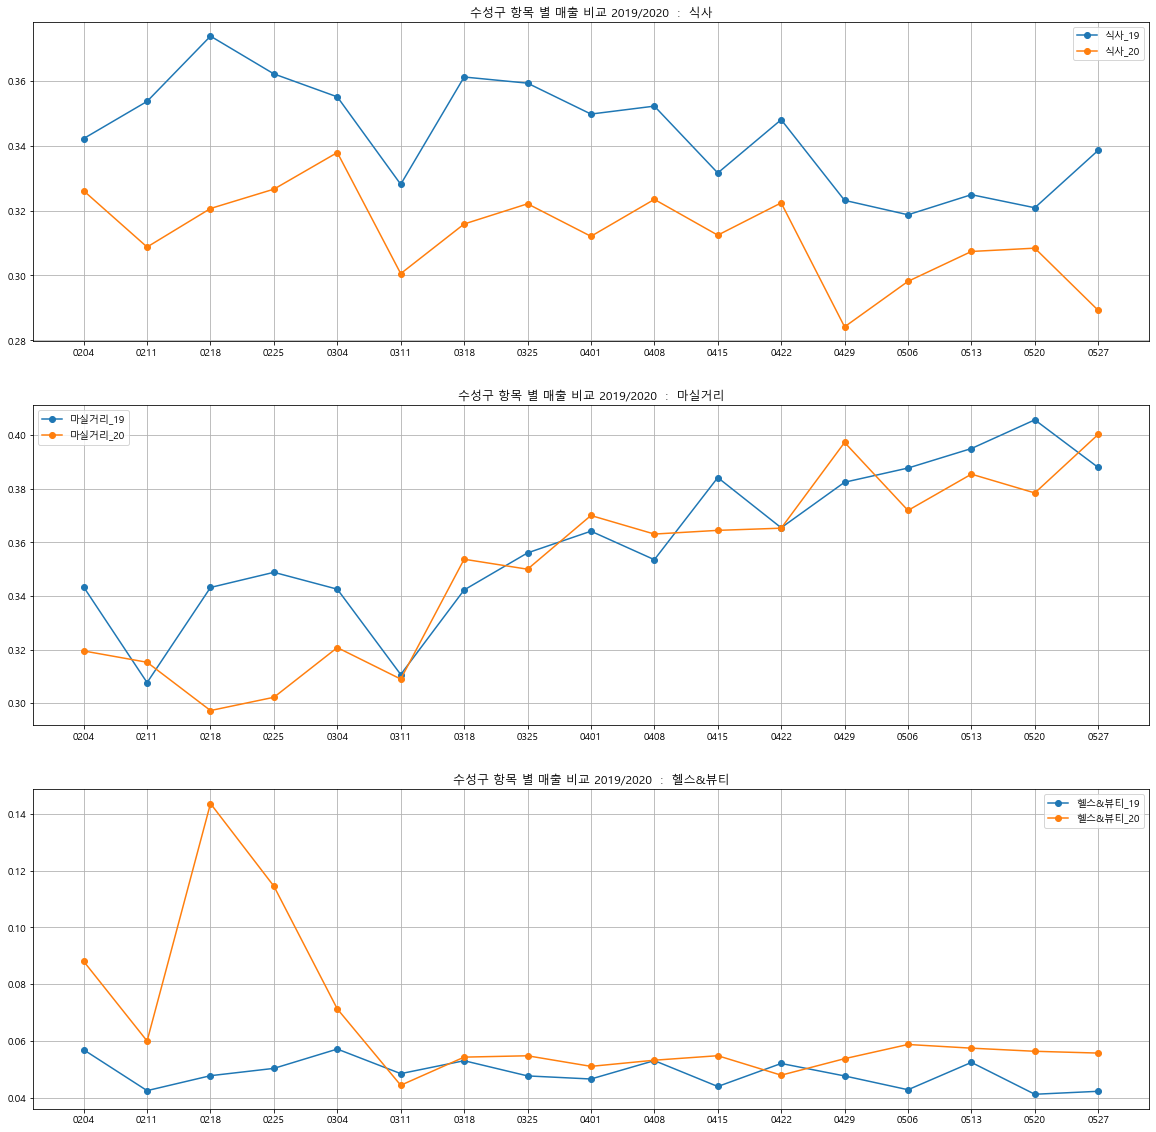

In [133]:
s19=Soosung_catmean_19[['식사_19','마실거리_19','헬스&뷰티_19']].reset_index(drop=True)
s20=Soosung_catmean_20[['식사_20','마실거리_20','헬스&뷰티_20']].reset_index(drop=True)

cat1=pd.concat([s19,s20],axis=1)
cat1.index=Soosung_catmean_19.index

Fg4 = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic')

plt.subplot(3,1,1)
plt.plot(cat1[['식사_19','식사_20']],marker='o')
plt.legend(['식사_19','식사_20'],loc='best')
plt.title('수성구 항목 별 매출 비교 2019/2020  :  식사')
plt.grid()

plt.subplot(3,1,2)
plt.plot(cat1[['마실거리_19','마실거리_20']],marker='o')
plt.legend(['마실거리_19','마실거리_20'],loc='best')
plt.title('수성구 항목 별 매출 비교 2019/2020  :  마실거리')
plt.grid()

plt.subplot(3,1,3)
plt.plot(cat1[['헬스&뷰티_19','헬스&뷰티_20']],marker='o')
plt.legend(['헬스&뷰티_19','헬스&뷰티_20'],loc='best')
plt.title('수성구 항목 별 매출 비교 2019/2020  :  헬스&뷰티')
plt.grid()


# plt.plot(cat1,marker='o')
# plt.legend(cat1.columns,loc='best')
# plt.title('수성구 항목 별 매출 비교 2019/2020')